In [1]:
import sys
sys.path.append('..') #to add top-level to path

from modules.opts import VolCurveAgg
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import pickle


In [2]:
with open('../data/intermediate_data/corn_dict.pickle','rb') as f:
    corn_dict = pickle.load(f)
with open('../data/intermediate_data//wheat_dict.pickle','rb') as f:
    wheat_dict = pickle.load(f)
with open('../data/intermediate_data//soybeans_dict.pickle','rb') as f:
    soybeans_dict = pickle.load(f)


In [3]:
corn_gamma_features = pd.DataFrame(index = corn_dict.keys(), columns = ['C_up_gamma', 
                                                                        'C_up_gamma_5', 
                                                                        'C_down_gamma',
                                                                        'C_down_gamma_5'])
for key in tqdm(corn_dict.keys()):
    vc = VolCurveAgg('C', key, corn_dict)
    corn_gamma_features.loc[key] = vc.features.iloc[0]

corn_gamma_features['C_up_diff_5'] = corn_gamma_features['C_up_gamma_5'] - corn_gamma_features['C_up_gamma']
corn_gamma_features['C_down_diff_5'] = corn_gamma_features['C_down_gamma_5'] - corn_gamma_features['C_down_gamma']

100%|██████████████████████████████████████████████████████████████████████████████████████████| 457/457 [03:29<00:00,  2.18it/s]


In [4]:
wheat_gamma_features = pd.DataFrame(index = wheat_dict.keys(), columns = ['W_up_gamma', 
                                                                          'W_up_gamma_5', 
                                                                          'W_down_gamma',
                                                                          'W_down_gamma_5'])
for key in tqdm(wheat_dict.keys()):
    vc = VolCurveAgg('W', key, wheat_dict)
    wheat_gamma_features.loc[key] = vc.features.iloc[0]
    
wheat_gamma_features['W_up_diff_5'] = wheat_gamma_features['W_up_gamma_5'] - wheat_gamma_features['W_up_gamma']
wheat_gamma_features['W_down_diff_5'] = wheat_gamma_features['W_down_gamma_5'] - wheat_gamma_features['W_down_gamma']

100%|██████████████████████████████████████████████████████████████████████████████████████████| 422/422 [03:49<00:00,  1.84it/s]


In [5]:
soybeans_gamma_features = pd.DataFrame(index = soybeans_dict.keys(), columns = ['S_up_gamma', 
                                                                                'S_up_gamma_5', 
                                                                                'S_down_gamma',
                                                                                'S_down_gamma_5'])
for key in tqdm(soybeans_dict.keys()):
    vc = VolCurveAgg('S', key, soybeans_dict)
    soybeans_gamma_features.loc[key] = vc.features.iloc[0]
    
soybeans_gamma_features['S_up_diff_5'] = soybeans_gamma_features['S_up_gamma_5'] - soybeans_gamma_features['S_up_gamma']
soybeans_gamma_features['S_down_diff_5'] = soybeans_gamma_features['S_down_gamma_5'] - soybeans_gamma_features['S_down_gamma']

100%|██████████████████████████████████████████████████████████████████████████████████████████| 438/438 [04:08<00:00,  1.76it/s]


In [6]:
corn_feat_cols = ['C_up_gamma_5','C_down_gamma_5', 'C_up_diff_5','C_down_diff_5']
corn_gamma_features.index.name = 'date'
corn_gamma_features[corn_feat_cols].to_csv('../data/features/corn_gamma_features.csv')
corn_gamma_features.head()

,C_up_gamma,C_up_gamma_5,C_down_gamma,C_down_gamma_5,C_up_diff_5,C_down_diff_5
date,,,,,,
2016-09-21,41950.8,53219.4,41912.9,53384.3,11268.6,11471.4
2016-09-22,41142.9,52737.6,42436.2,54080.6,11594.6,11644.4
2016-09-27,43065.8,56031.6,30289.5,37727.2,12965.8,7437.72
2016-09-29,43909.4,56912.6,31192,39498.5,13003.2,8306.5
2016-09-30,43952.3,56946.5,31746.4,40410.8,12994.2,8664.38


https://quant.stackexchange.com/questions/32974/proof-of-gamma-profit-formula

c:\users\gufra\.virtualenvs\trump_tweets-t_tuxmg9\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


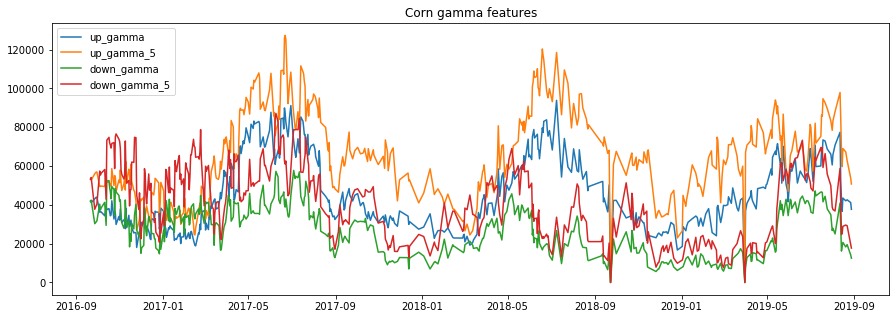

In [7]:
plt.subplots(figsize=(15,5))
plt.plot(corn_gamma_features['C_up_gamma'], label = 'up_gamma')
plt.plot(corn_gamma_features['C_up_gamma_5'], label = 'up_gamma_5')
         
plt.plot(corn_gamma_features['C_down_gamma'], label = 'down_gamma')
plt.plot(corn_gamma_features['C_down_gamma_5'], label = 'down_gamma_5')

plt.title("Corn gamma features")
plt.legend();

- Up_gamma_5 should always be larger than up_gamma, and down_gamma_5 should always be larger than down_gamma. As we move up (down) in spot, the delta of out of the money options increases at a faster rate, and so the potential options sellers to hedge their short options positions by buying (selling) more into the move.

- Notice those big spikes down around the end of 2018 and around april 2019. These were big moves in the spot over the weekend. For example, the one in April was caused by very heavy rains all across the MidWest that were threatening planting of agricultural products, and thus drove prices up across the board. The dataset we have has the open interest of the previous day, so when we calculate the gamma with a much higher spot price, we don't see all the new upside option buying in the open interest available to us. These spikes down are "realizations" of big gamma moves.

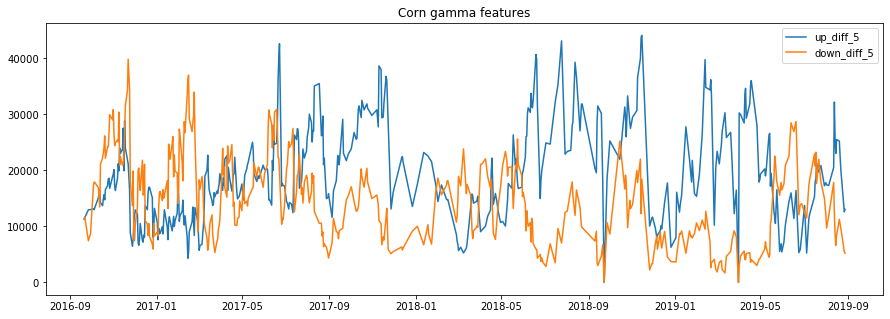

In [8]:
plt.subplots(figsize=(15,5))
plt.plot(corn_gamma_features['C_up_diff_5'], label = 'up_diff_5')
plt.plot(corn_gamma_features['C_down_diff_5'], label = 'down_diff_5')
plt.title("Corn gamma features")
plt.legend();

In [9]:
wheat_feat_cols = ['W_up_gamma_5','W_down_gamma_5', 'W_up_diff_5','W_down_diff_5']
wheat_gamma_features.index.name = 'date'
wheat_gamma_features.to_csv('../data/features/wheat_gamma_features.csv')
wheat_gamma_features.head()

,W_up_gamma,W_up_gamma_5,W_down_gamma,W_down_gamma_5,W_up_diff_5,W_down_diff_5
date,,,,,,
2016-09-27,8576.26,11281.7,4087.66,5119.84,2705.44,1032.19
2016-09-29,8748.94,11350.2,4969.16,6931.76,2601.23,1962.6
2016-10-04,8552.08,11246,4946.62,6619.58,2693.88,1672.96
2016-10-11,11749.6,14704.7,6785.7,9338.08,2955.02,2552.38
2016-10-13,14455.3,18394,5898.95,8111.15,3938.7,2212.2


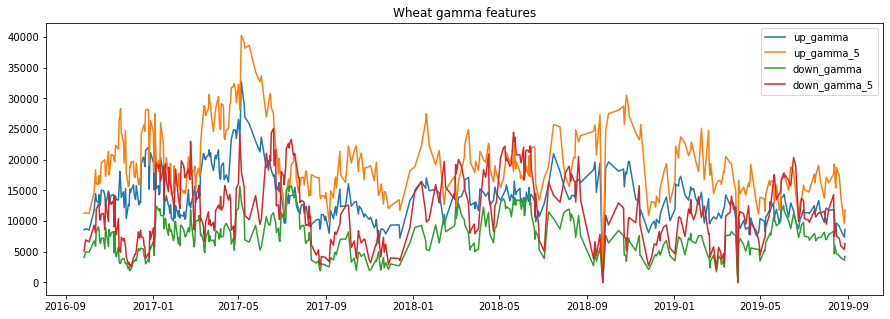

In [10]:
plt.subplots(figsize=(15,5))
plt.plot(wheat_gamma_features['W_up_gamma'], label = 'up_gamma')
plt.plot(wheat_gamma_features['W_up_gamma_5'], label = 'up_gamma_5')
         
plt.plot(wheat_gamma_features['W_down_gamma'], label = 'down_gamma')
plt.plot(wheat_gamma_features['W_down_gamma_5'], label = 'down_gamma_5')

plt.title("Wheat gamma features")
plt.legend();

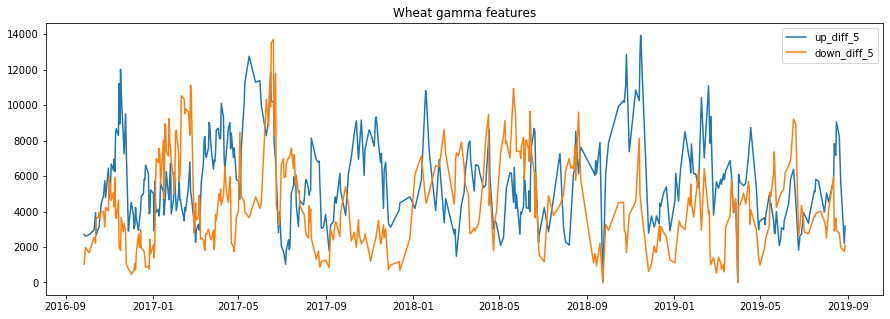

In [11]:
plt.subplots(figsize=(15,5))
plt.plot(wheat_gamma_features['W_up_diff_5'], label = 'up_diff_5')
plt.plot(wheat_gamma_features['W_down_diff_5'], label = 'down_diff_5')
plt.title("Wheat gamma features")
plt.legend();

In [12]:
soybeans_feat_cols = ['S_up_gamma_5','S_down_gamma_5', 'S_up_diff_5','S_down_diff_5']
soybeans_gamma_features.index.name = 'date'
soybeans_gamma_features.to_csv('../data/features/soybeans_gamma_features.csv')
soybeans_gamma_features.head()

,S_up_gamma,S_up_gamma_5,S_down_gamma,S_down_gamma_5,S_up_diff_5,S_down_diff_5
date,,,,,,
2016-09-21,21281.9,34465.7,22955.4,39120.5,13183.8,16165.1
2016-09-22,24363.4,37548.5,23053.6,38822.6,13185.1,15769.1
2016-09-23,16074.6,29833.2,22494.6,39086.8,13758.6,16592.2
2016-09-26,23479,39720.8,19206.1,33082.3,16241.8,13876.2
2016-09-27,22043.8,38721.8,21561.6,34020.3,16678,12458.7


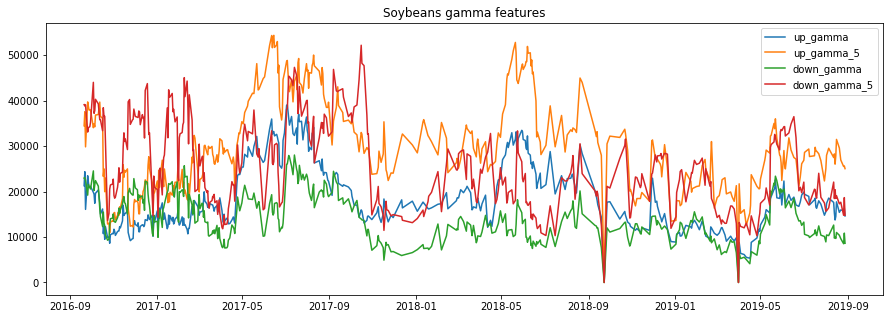

In [13]:
plt.subplots(figsize=(15,5))
plt.plot(soybeans_gamma_features['S_up_gamma'], label = 'up_gamma')
plt.plot(soybeans_gamma_features['S_up_gamma_5'], label = 'up_gamma_5')
         
plt.plot(soybeans_gamma_features['S_down_gamma'], label = 'down_gamma')
plt.plot(soybeans_gamma_features['S_down_gamma_5'], label = 'down_gamma_5')

plt.title("Soybeans gamma features")
plt.legend();

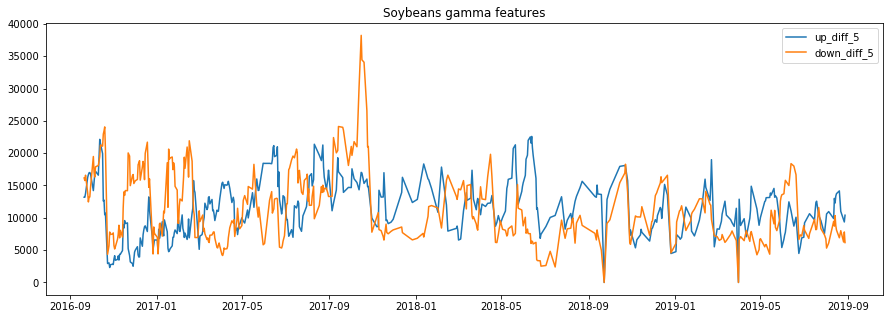

In [14]:
plt.subplots(figsize=(15,5))
plt.plot(soybeans_gamma_features['S_up_diff_5'], label = 'up_diff_5')
plt.plot(soybeans_gamma_features['S_down_diff_5'], label = 'down_diff_5')
plt.title("Soybeans gamma features")
plt.legend();